# **Basic Image Classification**
Classifying labeled subsets of the 80 million tiny images dataset, collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

##**Image Classification Project Overview:**

## **Objective**:
This project focuses on training a **Convolutional Neural Network (CNN)** model to classify images, such as images of airplanes, automobiles, birds, cats, etc.

## **Tools Used**:
We leverage [**tf.keras**](https://www.tensorflow.org/guide/keras), TensorFlow's high-level API, which allows us to build and train models efficiently and intuitively.


### **Convolutional Neural Networks for CIFAR Project**

#### **Introduction:**

This project utilizes Convolutional Neural Network (CNN) architecture for image classification on the CIFAR dataset. CNNs are a powerful class of deep learning models that excel in processing grid-like data, such as images, due to their inherent properties:

**Feature Engineering:** Unlike traditional neural networks, CNNs automatically learn and optimize filters (kernels) during training, eliminating the need for manual feature engineering. This allows the network to discover relevant patterns and features directly from the input data.

**Reduced Preprocessing:** CNNs require minimal pre-processing compared to other image recognition algorithms. This reduces the complexity of the overall pipeline and enables end-to-end learning.

**Regularization:** CNNs employ sparsity and weight sharing techniques, leading to fewer connections and regularized weights. This helps to reduce overfitting and improve generalization performance.

#### **CNN Architecture:**

The specific architecture of the CNN for the CIFAR project will depend on various factors, including the size and complexity of the dataset, computational resources, and desired performance.

Typical CNN architecture for image classification, being made up of the following components:

* **Convolutional Layers:** These layers apply filters to the input data, extracting relevant features and generating feature maps.
* **Pooling Layers:** These layers downsample the feature maps by applying pooling operations (e.g., max-pooling) to reduce the dimensionality and computational complexity.
* **Fully Connected Layers:** These layers perform non-linear transformations on the flattened feature maps to learn higher-level representations and ultimately produce class predictions.

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Depednecies/libraries that will help us
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

170498071/170498071 [==============================] - 3s 0us/step
2.15.0


## **Importing the CIFAR-10 dataset:**

This code uses the [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset which contains 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.


<table>
  <tr><td>
    <img src="https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
  </td></tr>
</table>

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [ ]:
# Immporting the CIFAR-10 dataset
cifar10 = tf.keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 32x32 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Airplane</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Automobile</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Bird</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Cat</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Deer</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Dog</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Frog</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Horse</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Ship</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Truck</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

## **Exploring the data:**

Let's explore the format of the dataset before training the model. The following shows there are 50,000 images in the training set, with each image represented as 32 x 32 pixels:

In [ ]:
train_images.shape

(50000, 32, 32, 3)

Likewise, there are 50,000 labels in the training set:

In [ ]:
len(train_labels)

50000

Each label is an integer between 0 and 9:

In [ ]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 32 x 32 pixels:

In [ ]:
test_images.shape

(10000, 32, 32, 3)

And the test set contains 10,000 images labels:

In [ ]:
len(test_labels)

10000

###**Data Preprocessing: Preparing Images for Learning**

Before feeding the data into our CNN, we need to perform some essential preprocessing steps to ensure optimal learning and performance. This stage is crucial, it can significantly impact the accuracy and efficiency of our model.

Let's peek at the first image in the training set. You'll notice that each pixel's falls within the range of 0 to 255. While technically accurate, this format isn't ideal for neural networks. CNN's prefer data normalized to a specific range, typically between 0 and 1. This allows them to focus on learning complex relationships within the data rather than struggling with large numerical values.

Therefore, one of our initial preprocessing steps involves **scaling** each pixel intensity to fall within the desired range. This can be achieved by dividing each pixel value by 255. This simple yet powerful transformation ensures our data is ready for the neural network's learning journey.



**Why CNNs prefer 0s and 1s:**

* **Computational efficiency:** Numbers between 0 and 1 require less computation during training and inference compared to larger values. This is especially important for large datasets and complex models.
* **Improved Gradient Flow:** When using activation functions like ReLU, inputs between 0 and 1 ensure a smooth flow of gradients during backpropagation, facilitating faster and more efficient learning.
* **Reduced risk of exploding gradients:** Large values can lead to exploding gradients, where the gradient values become too large during backpropagation and destabilize the training process. Normalizing inputs helps prevent this.

**However, CNNs can handle non-binary data:**

* **Pixels in images:** Most images use RGB channels with values ranging from 0 to 255. CNNs can still effectively learn from these images by scaling them to the desired range (e.g., [0, 1]) during preprocessing.
* **Other types of data:** CNNs can be adapted to work with other types of data, such as audio signals, text data, and even medical scans. The pre-processing steps might involve different normalization techniques depending on the data type.

**So, the key takeaway is:**

* CNNs benefit from data normalized between 0 and 1 for computational efficiency, gradient flow, and stability.
* However, they aren't limited to binary data and can work with various data types after appropriate normalization.



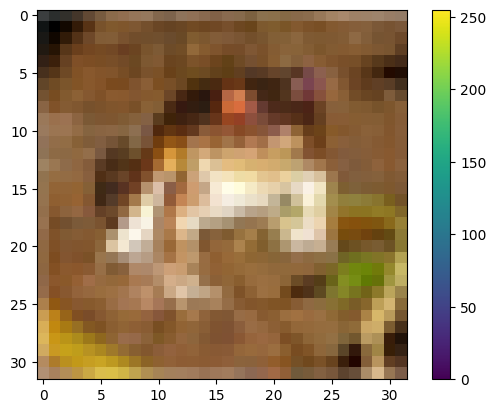

In [ ]:
# Display the first image from the training dataset
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scaling these values to a range of 0 to 1 before feeding them to the neural network model. To do so, I will divide the values by 255. It's important that the *training set* and the *testing set* are preprocessed in the same way:

In [ ]:
# Normalizing pixel values of images
# Dividing each pixel value by 255.0 to scale them to the range [0, 1]
# This improves model performance for our CNN and other neural network architecture
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that I am ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

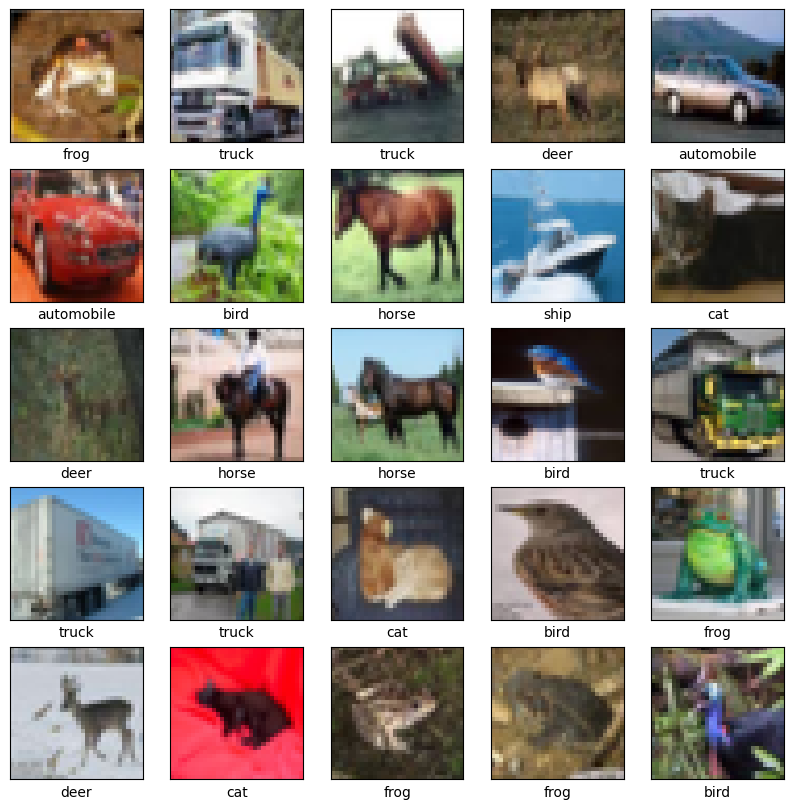

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## **Building the model:**

Building the neural network requires configuring the layers of the model, then compiling the model.

In [ ]:
#uPDATE: Expanding the variety of transformations in data augmentation
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),  # Include vertical flips
  tf.keras.layers.RandomRotation(0.2),  # Increase rotation range
  tf.keras.layers.RandomZoom(0.2, 0.2),  # Increase zoom range and add vertical zoom
  tf.keras.layers.RandomContrast(0.2)  # Add random contrast adjustment
])

### **Setting up the layers**

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them.

Most of deep learning consists of chaining together simple layers.

**We are implementing a convolutional neural network (CNN) using TensorFlow's Keras API. This model is typically used for image classification tasks. Let's break down each component:**

***Sequential Model:***
tf.keras.Sequential creates a linear stack of layers. This means each layer has exactly one input tensor and one output tensor.

This code defines a Convolutional Neural Network (CNN) using TensorFlow's Keras API. The model is structured for image classification tasks, specifically configured for input images of size 32x32 pixels with 3 color channels (RGB). Here's a breakdown of its layers:

1. **First Convolutional Layer**:
   - `tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))`: This layer applies 32 convolutional filters of size 3x3 each, using the ReLU (Rectified Linear Unit) activation function. The `input_shape=(32, 32, 3)` specifies the shape of input images.

2. **Batch Normalization**:
   - `tf.keras.layers.BatchNormalization()`: This layer normalizes the output of the previous layer, stabilizing and speeding up the training process by reducing the internal covariate shift.

3. **Max Pooling**:
   - `tf.keras.layers.MaxPooling2D((2, 2))`: This layer reduces the spatial dimensions (height and width) of the input volume by taking the maximum value over a 2x2 pooling window. It helps reduce the computation and parameters, thereby controlling overfitting.

4. **Second and Third Convolutional Layers**:
   - Similar to the first layer but with 64 and then 128 filters, respectively. Increasing the number of filters allows the network to learn more complex features at each level.

5. **Additional Batch Normalization and Max Pooling**:
   - Applied after each convolutional layer to further stabilize learning and reduce the feature map sizes.

6. **Flattening**:
   - `tf.keras.layers.Flatten()`: Converts the 3D output of the previous layers into a 1D array, making it possible to feed it into the dense layers.

7. **Dropout**:
   - `tf.keras.layers.Dropout(0.5)`: Randomly sets 50% of the input units to 0 at each update during training, helping to prevent overfitting.

8. **Dense Layers**:
   - The first `Dense` layer with 128 units, followed by a final `Dense` layer with 10 units (presumably for 10 classes in the classification task), both using ReLU activation functions. The final layer outputs the class predictions.


Summary: This architecture is a common pattern in designing CNNs for image classification. The convolutional layers (with ReLU activation) are used for feature extraction, max pooling layers reduce dimensionality, dropout layers mitigate overfitting, and dense layers make the final classification decision. The model is well-suited for classification tasks like classifying images into different categories, such as the classes in the CIFAR-10 dataset. The increasing number of filters in the convolutional layers allows the model to capture more complex and abstract features at each level.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),  # Add Batch Normalization
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),  # Increase filter size
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(128, activation='relu'),  # Increase Dense layer units
    tf.keras.layers.Dense(10)
])

### **Compiling the model**:

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Update: Adjusted the learning rate from 0.001 to 0.0005
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## **Training the Model:**

**Training the neural network model requires the following steps:**

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### **Feeding the model:**

To start training,  we will call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 99s 61ms/step - loss: 1.6045 - accuracy: 0.4354
Epoch 2/10
1563/1563 [==============================] - 109s 70ms/step - loss: 1.2127 - accuracy: 0.5655
Epoch 3/10
1563/1563 [==============================] - 95s 61ms/step - loss: 1.0657 - accuracy: 0.6219
Epoch 4/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.9606 - accuracy: 0.6624
Epoch 5/10
1563/1563 [==============================] - 106s 68ms/step - loss: 0.8905 - accuracy: 0.6859
Epoch 6/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.8281 - accuracy: 0.7082
Epoch 7/10
1563/1563 [==============================] - 101s 65ms/step - loss: 0.7810 - accuracy: 0.7266
Epoch 8/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.7397 - accuracy: 0.7404
Epoch 9/10
1563/1563 [==============================] - 94s 60ms/step - loss: 0.7063 - accuracy: 0.7487
Epoch 10/10
1563/1563 [==============================] - 92s 

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of 0.76% (0.7604%) on the training data.

### **Evaluating Accuracy:**

Next, compare how the model performs on the test dataset:

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 5s - loss: 0.7502 - accuracy: 0.7377 - 5s/epoch - 15ms/step

Test accuracy: 0.7376999855041504


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.


### **Making predictions:**

With the model trained, we can now use it to make predictions about some images.

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 7s 22ms/step


Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [ ]:
predictions[0]

array([1.2382631e-03, 1.9477760e-05, 2.8284530e-03, 8.5740089e-01,
       9.0662972e-04, 1.2299581e-01, 1.2311757e-02, 1.9025298e-04,
       2.0529861e-03, 5.5522334e-05], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [ ]:
np.argmax(predictions[0])

3

So, the model is most confident that this image is an cat, or `class_names[3]`. Examining the test label shows that this classification is correct:

In [ ]:
test_labels[0]

array([3], dtype=uint8)

Define functions to graph the full set of 10 class predictions.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  """
  Plots a single image with its prediction and ground truth label.

  Args:
    i: Index of the image to plot.
    predictions_array: Array containing the model's predictions for the image.
    true_label: Ground truth label for the image.
    img: The image data.
  """
  # Extracting true label and image data from their respective lists
  true_label, img = true_label[i][0], img[i]

  # Removing grid lines and axes ticks for cleaner visualization
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  # Displaying the image using a binary colormap
  plt.imshow(img, cmap=plt.cm.binary)

  # Getting the predicted label based on the highest probability in the predictions array
  predicted_label = np.argmax(predictions_array)

  # Setting text color based on whether the prediction was correct or not
  color = 'blue' if predicted_label == true_label else 'red'

  # Generating and display the label text with prediction details
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                     color=color)


def plot_value_array(i, predictions_array, true_label):
  """
  Plots a bar chart showing the predicted probabilities for each class.

  Args:
    i: Index of the image to plot.
    predictions_array: Array containing the model's predictions for the image.
    true_label: Ground truth label for the image.
  """

  # Extracting true label from its list
  true_label = true_label[i][0]

  # Setting display options for the bar chart
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])

  # Plotting bars for each class probability
  thisplot = plt.bar(range(10), predictions_array, color="#777777")

  # Setting limits for the y-axis (probability range)
  plt.ylim([0, 1])

  # Highlighting the predicted and true labels with different colors
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### **Verify predictions:**

With the model trained, we can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

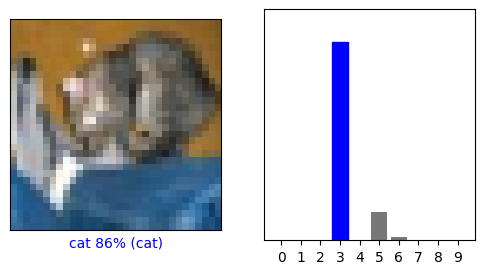

In [ ]:
# Select the first image for visualization (index 0)
i = 0

# Creating a figure with specific dimensions
plt.figure(figsize=(6, 3))

# Creating two subplots for image and prediction bar chart
plt.subplot(1, 2, 1)

# Plotting the image with its prediction and ground truth label
plot_image(i, predictions[i], test_labels, test_images)

# Switching to the second subplot
plt.subplot(1, 2, 2)

# Plotting the bar chart showing individual class probabilities
plot_value_array(i, predictions[i], test_labels)

# Displaying the plotted figure
plt.show()

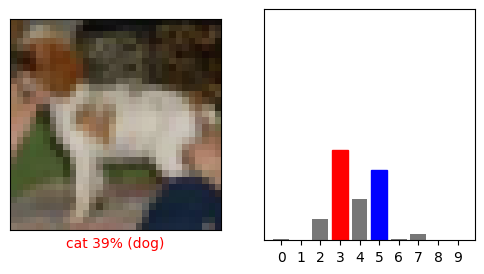

In [ ]:
#Let's do another one!
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. (*Note that the model can be wrong even when very confident.*)

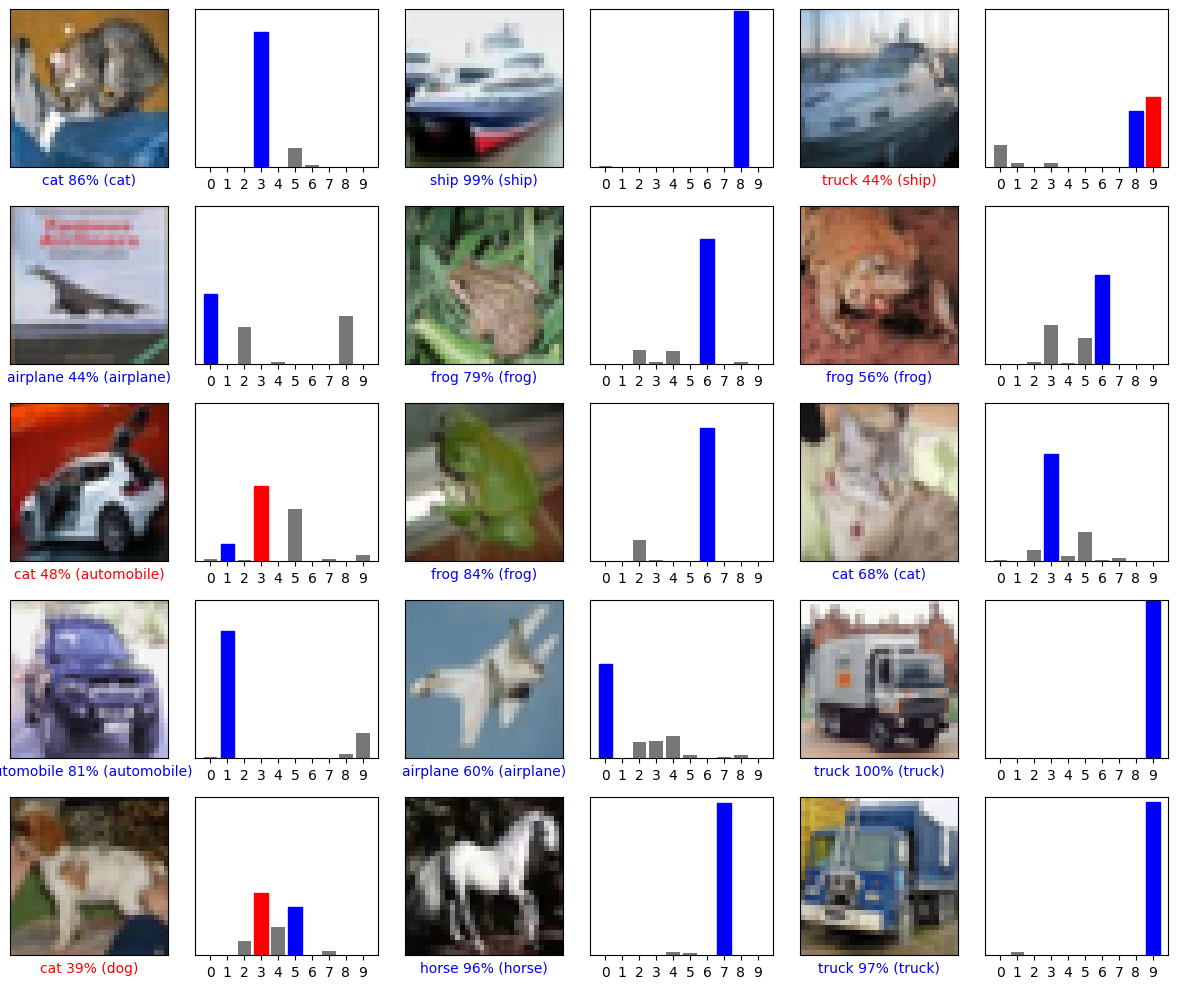

In [ ]:
# Define number of rows and columns for grid layout
num_rows = 5
num_cols = 3

# Calculate total number of images to display
num_images = num_rows * num_cols

# Create a figure with desired dimensions
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

# Loop through each image and plot its prediction and ground truth
for i in range(num_images):
  # Plot image with prediction and true label
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
  plot_image(i, predictions[i], test_labels, test_images)

  # Plot individual class probabilities
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
  plot_value_array(i, predictions[i], test_labels)

# Adjust subplot spacing for better layout
plt.tight_layout()

# Display the figure
plt.show()

### **Using the Trained Model for Predictions:**

Now that we have a trained model, it's time to put it to the test! We can use the model to predict the class of an unseen image.

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape) # Printing the shape of the image (height, width, channels)

(32, 32, 3)


In [ ]:
# Converting the single image "img" into a batch with one element
# using np.expand_dims to add a new dimension at axis 0
img = (np.expand_dims(img,0))

# Print the new shape of the image batch, which should be (1, 32, 32, 3)
# indicating a batch with one image of the original dimensions
print(img.shape)

(1, 32, 32, 3)


Now predict the correct label for this image:

In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 24ms/step
[[1.0921632e-02 1.6476347e-03 5.6424356e-06 2.5997379e-06 1.7760198e-06
  2.0063062e-08 4.5026059e-08 1.2793795e-07 9.8731601e-01 1.0455938e-04]]


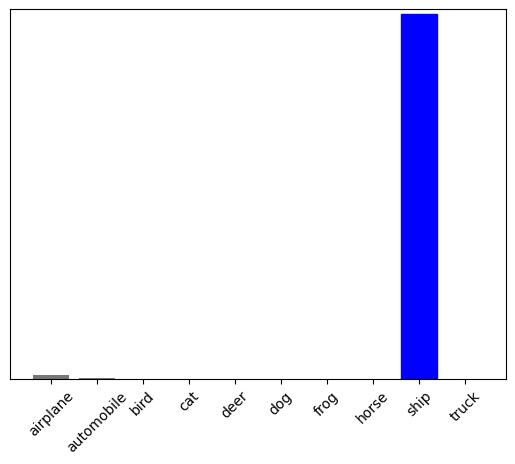

In [ ]:
plot_value_array(1, predictions_single[0], test_labels) # Plot the bar chart showing individual class probabilities for the first prediction
_ = plt.xticks(range(10), class_names, rotation=45) # Set x-axis ticks with corresponding class names and rotate them for better readability
plt.show() # Show the generated plot

In [ ]:
np.argmax(predictions_single[0]) #using NumPy to find the index of the maximum value in the first prediction of predictions_single

8

### **Enhancing Model Accuracy:**

As the current Convolutional Neural Network (CNN) achieves an accuracy of approximately 75.8% on the CIFAR-10 dataset, there is significant potential for improvement. Enhancing the model's accuracy is essential for reducing misclassifications. My strategy involves not only current adjustments but also a commitment to ongoing refinement. As I progress, I will continue to make changes, with the goal of improving the model and results!

## **Conclusion:**

This project sought to attain high precision in image classification on the CIFAR dataset by utilizing the capabilities of Convolutional Neural Networks (CNNs). It employed various technologies and tools, including Python, TensorFlow, Keras, and Numpy, among others, achieving such tasks!

## **CIFAR-10 Dataset Citation:**


Alex Krizhevsky (2009). Learning Multiple Layers of Features from Tiny Images. Master’s thesis, University of Toronto.
[https://www.cs.toronto.edu/~kriz/cifar.html](https://www.cs.toronto.edu/~kriz/cifar.html)


### **Exporting/Saving the Model for PROD:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model_path = '/content/drive/My Drive/MyModels/my_model.h5'

In [ ]:
model.save(model_path)